## Confguration Space

In this notebook you'll create a configuration space given a map of the world and setting a particular altitude for your drone. You'll read in a `.csv` file containing obstacle data which consists of six columns $x$, $y$, $z$ and $\delta x$, $\delta y$, $\delta z$.

You can look at the `.csv` file [here](/edit/colliders.csv). The first line gives the map center coordinates and the file is arranged such that:

* $x$ -> NORTH
* $y$ -> EAST
* $z$ -> ALTITUDE (positive up, note the difference with NED coords)

Each $(x, y, z)$ coordinate is the center of an obstacle. $\delta x$, $\delta y$, $\delta z$ are the half widths of the obstacles, meaning for example that an obstacle with $(x = 37, y = 12, z = 8)$ and $(\delta x = 5, \delta y = 5, \delta z = 8)$ is a 10 x 10 m obstacle that is 16 m high and is centered at the point $(x, y) = (37, 12)$ at a height of 8 m.

Given a map like this, the free space in the $(x, y)$ plane is a function of altitude, and you can plan a path around an obstacle, or simply fly over it! You'll extend each obstacle by a safety margin to create the equivalent of a 3 dimensional configuration space. 

Your task is to extract a 2D grid map at 1 metre resolution of your configuration space for a particular altitude, where each value is assigned either a 0 or 1 representing feasible or infeasible (obstacle) spaces respectively.

The end result should look something like this ... (colours aren't important)

![title](grid_map.png)

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline

/home/calcgen2/anaconda3/envs/fcnd/lib/python3.6/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
plt.rcParams["figure.figsize"] = [12, 12]

Read the csv file which contains the coordinates of the obstacles. 

In [3]:
filename = 'colliders.csv'
# Read in the data skipping the first two lines.  
# Note: the first line contains the latitude and longitude of map center
# Where is this??
data = np.loadtxt(filename,delimiter=',',dtype='Float64',skiprows=2)
print(data)

[[-310.2389   -439.2315     85.5         5.          5.         85.5     ]
 [-300.2389   -439.2315     85.5         5.          5.         85.5     ]
 [-290.2389   -439.2315     85.5         5.          5.         85.5     ]
 ...
 [ 257.8061    425.1645      1.75852     1.292725    1.292725    1.944791]
 [ 293.9967    368.3391      3.557666    1.129456    1.129456    3.667319]
 [ 281.5162    354.4156      4.999351    1.053772    1.053772    4.950246]]


In [4]:
# Static drone altitude (metres)
drone_altitude = 5

# Minimum distance required to stay away from an obstacle (metres)
# Think of this as padding around the obstacles.
safe_distance = 3

The given function will take the data from the file describing the obstacles city and will return a 2D grid representation showing open and closed spaces.

In [5]:
def create_grid(data, drone_altitude, safety_distance):
    """
    Returns a grid representation of a 2D configuration space
    based on given obstacle data, drone altitude and safety distance
    arguments.
    """

    # minimum and maximum north coordinates
    north_min = np.floor(np.amin(data[:, 0] - data[:, 3]))
    north_max = np.ceil(np.amax(data[:, 0] + data[:, 3]))

    # minimum and maximum east coordinates
    east_min = np.floor(np.amin(data[:, 1] - data[:, 4]))
    east_max = np.ceil(np.amax(data[:, 1] + data[:, 4]))

    # given the minimum and maximum coordinates we can
    # calculate the size of the grid.
    north_size = int(np.ceil(north_max - north_min))
    east_size = int(np.ceil(east_max - east_min))
    # Initialize an empty grid
    grid = np.zeros((north_size, east_size))
    # Center offset for grid
#     north_min_center = np.min(data[:, 0])
#     east_min_center = np.min(data[:, 1])
    north_min_center = north_min
    east_min_center = east_min
    print(north_size, east_size)
    print(north_min_center, east_min_center)
    # Populate the grid with obstacles
    for i in range(data.shape[0]):
        north, east, alt, d_north, d_east, d_alt = data[i, :]
        # TODO: Determine which cells contain obstacles
        # and set them to 1.
        #
        # Example:
        #
        #    grid[north_coordinate, east_coordinate] = 1
        if (d_alt + alt + safe_distance) >= drone_altitude:
            for dN in range(int(np.ceil(d_north + safety_distance))):
                for dE in range(int(np.ceil(d_east + safety_distance))):
        #                     print(dN, dE)
                    grid_north = -north_min_center + north
                    grid_east = -east_min_center + east
                    grid[int(np.clip(grid_north + dN, 0, north_size-1)), int(np.clip(grid_east + dE, 0, east_size-1))] = 1
                    grid[int(np.clip(grid_north - dN, 0, north_size-1)), int(np.clip(grid_east + dE, 0, east_size-1))] = 1
                    grid[int(np.clip(grid_north + dN, 0, north_size-1)), int(np.clip(grid_east - dE, 0, east_size-1))] = 1
                    grid[int(np.clip(grid_north - dN, 0, north_size-1)), int(np.clip(grid_east - dE, 0, east_size-1))] = 1
    return grid

In [6]:
grid = create_grid(data, drone_altitude, safe_distance)

921 921
-316.0 -445.0


IndexError: index 921 is out of bounds for axis 0 with size 921

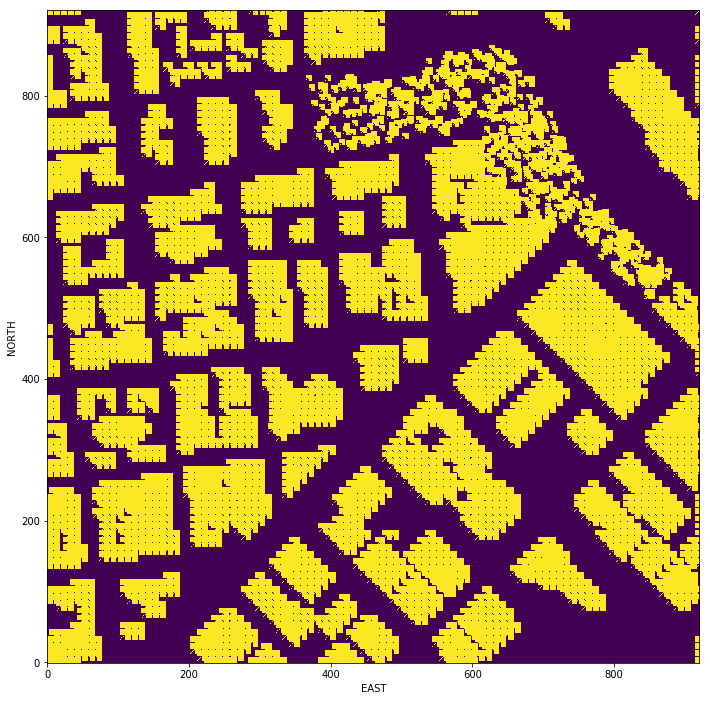

In [85]:
# equivalent to
# plt.imshow(np.flip(grid, 1), origin='upper')
# NOTE: we're placing the origin in the lower lefthand corner here
# so that north is up, if you didn't do this north would be positive down
plt.imshow(grid, origin='lower') 

plt.xlabel('EAST')
plt.ylabel('NORTH')
plt.show()

[solution](/notebooks/Configuration-Space-Solution.ipynb)